# Pymaceuticals Inc.
---

### Analysis

- The performance of Capomulin and Ramicane were the most promising. Both Capomulin and Ramicane produced the lowest Mean Tumor Volumes, at 40.675 and 40.217, respectively.
- Drug Regimens Ketapril, Naftisol, and Stelasyn all underperformed; the Mean Tumor Volume for each exceeded the numbers proceeded by the Placeebo.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_meta_results_unsorted = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
mouse_meta_results = mouse_meta_results_unsorted.sort_values(by=["Timepoint"])
# Display the data table for preview
mouse_meta_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
159,s166,0,45.0,0,Placebo,Male,19,27
160,x773,0,45.0,0,Placebo,Female,21,30
161,w167,0,45.0,0,Placebo,Female,6,28
162,t718,0,45.0,0,Placebo,Female,10,30


In [2]:
# Checking the number of mice.
group_mice = mouse_meta_results.groupby(["Mouse ID"]).count()
number_of_mice = len(group_mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicate_mice = mouse_meta_results.duplicated(subset=["Mouse ID", "Timepoint"]).sum()
extract_duplicate_mice = mouse_meta_results.loc[mouse_meta_results.duplicated(),:]
extract_duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = mouse_meta_results.loc[mouse_meta_results["Mouse ID"] == "g989"]
all_duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
107,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_meta_results = mouse_meta_results.drop(mouse_meta_results[mouse_meta_results["Mouse ID"] == "g989"].index)
clean_mouse_meta_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
159,s166,0,45.0,0,Placebo,Male,19,27
160,x773,0,45.0,0,Placebo,Female,21,30
161,w167,0,45.0,0,Placebo,Female,6,28
162,t718,0,45.0,0,Placebo,Female,10,30


In [6]:
# Checking the number of mice in the clean DataFrame.
regroup_mice = clean_mouse_meta_results.groupby(["Mouse ID"]).count()
new_number_of_mice = len(regroup_mice)
new_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_volume = clean_mouse_meta_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_volume = clean_mouse_meta_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_volume = clean_mouse_meta_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_volume = clean_mouse_meta_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_volume = clean_mouse_meta_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_volume, 
 "Median Tumor Volume": median_volume,
 "Tumor Volume Variance": variance_volume,
 "Tumor Volume St. Dev.": stdev_volume,
 "Tumor Volume Std. Err.": sem_volume
})

mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

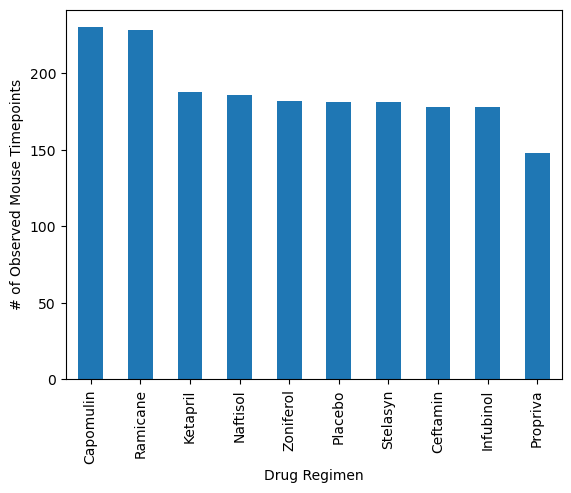

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
values = clean_mouse_meta_results["Drug Regimen"].value_counts()
values.plot(kind="bar")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


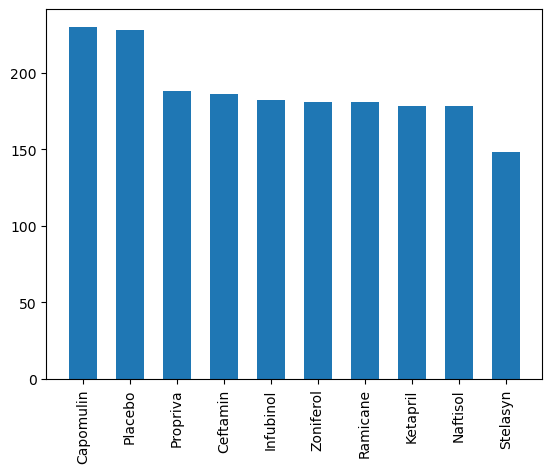

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = list(clean_mouse_meta_results["Drug Regimen"].unique())
values = clean_mouse_meta_results["Drug Regimen"].value_counts()
plt.bar(drug_regimen, values, width=0.6)
plt.xticks(rotation="vertical")
plt.show()

Text(0, 0.5, 'Sex')

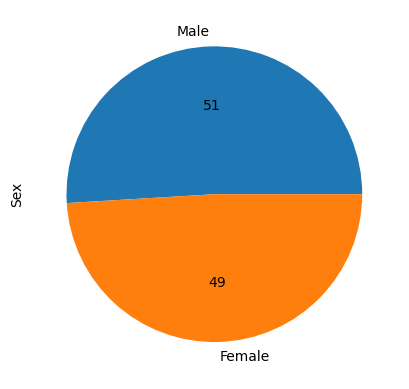

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_mouse_meta_results["Sex"].value_counts()
mouse_gender.plot.pie(legend=False,  autopct="%.f")
plt.ylabel("Sex")

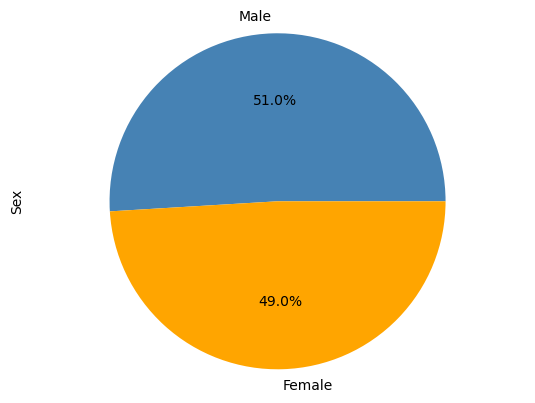

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.

labels = ["Male", "Female"]
colors = ["Steelblue", "Orange"]
male = clean_mouse_meta_results.loc[clean_mouse_meta_results["Sex"] == "Male", :]
female = clean_mouse_meta_results.loc[clean_mouse_meta_results["Sex"] == "Female", :]
count_male = len(male)
count_female = len(female)
sex = [count_male, count_female]
plt.axes().set_ylabel("Sex")
plt.pie(sex, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
find_timepoint = clean_mouse_meta_results.groupby("Mouse ID")["Timepoint"].max()  
find_timepoint = find_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = find_timepoint.merge(clean_mouse_meta_results, on=["Mouse ID","Timepoint"], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for item in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"]==item, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lb = lowerq - (1.5*iqr)
    up = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lb) | (tumor_vol > up)]
    print(f'{item} outlier = {outliers}')

Capomulin outlier = Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier = Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlier = 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlier = Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

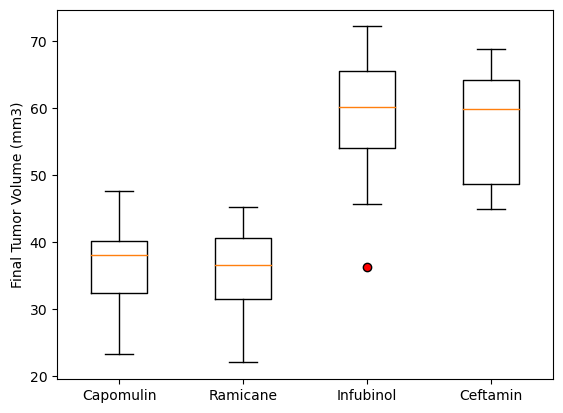

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_data, labels=treatments, flierprops = dict(markerfacecolor = "red"))
plt.show

## Line and Scatter Plots

In [16]:
capomulin_drug_data = clean_mouse_meta_results.loc[clean_mouse_meta_results["Drug Regimen"] == "Capomulin"]

In [17]:
capomulin_mouse = capomulin_drug_data.loc[capomulin_drug_data["Mouse ID"] == "l509"]
count_couse = capomulin_mouse["Mouse ID"].value_counts()
count_couse

Mouse ID
l509    10
Name: count, dtype: int64

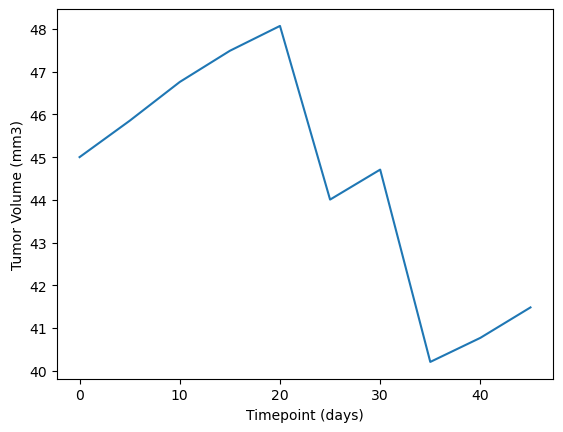

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#capomulin_mouse = mouse_meta_results.loc[mouse_meta_results["Mouse ID"] == "l509"]
y = capomulin_mouse["Tumor Volume (mm3)"]
x = capomulin_mouse["Timepoint"]
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y)
plt.show()

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

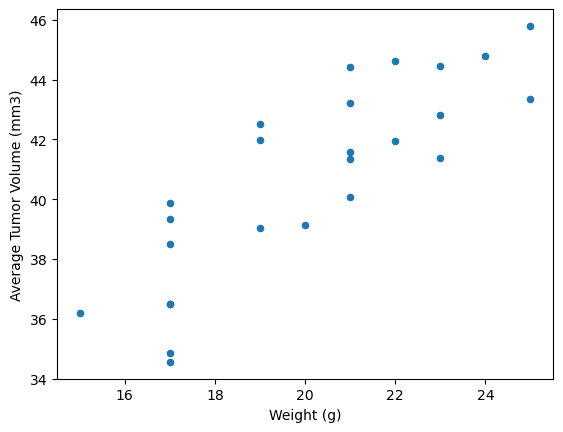

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_specific_data = clean_mouse_meta_results.loc[clean_mouse_meta_results["Drug Regimen"] == "Capomulin",:]
weight_capomulin = drug_specific_data.groupby("Mouse ID")["Weight (g)"].max()
tumor_vol_capomulin = drug_specific_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_data = pd.DataFrame({
    "Weight (g)": weight_capomulin,
    "Average Tumor Volume (mm3)": tumor_vol_capomulin
})
capomulin_data.plot.scatter(x="Weight (g)", y="Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


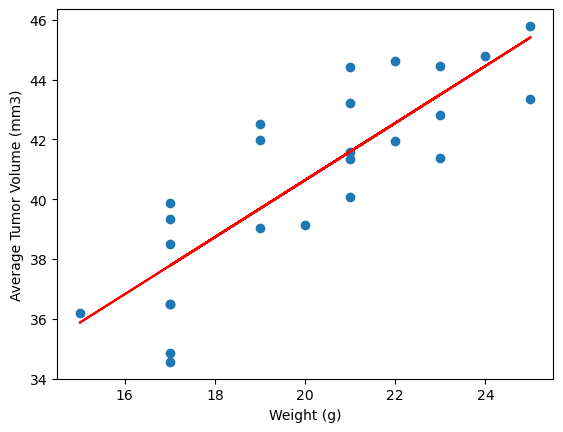

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Average Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")